# EdX Courses Analysis:

# Objective:
The primary objective of this project is to analyse and draw conclusions of different courses available on EdX Website

# Steps:
    1. Importing Necessary Libraries
    2. Basic Data Exploration
        2.1 Dimensionality of the dataset
        2.2 Top 5 and last 5 records of Data
        2.3 General Information of the data
        2.4 Unique Labels of data
        2.5 Missing values
        2.6 Duplicate values
    3. Data Cleansing
        3.1 Removing unnecessary columns
        3.2 Removing Duplicated values
        3.3 Converting text to lower
        3.4 Removing punctuation marks
        3.5 Removing Stopwords
        3.6 Removing Numbers
        3.7 Removing URL's
        3.8 Lemmetisation
    4. Data Exploartion and Visualisation after cleaning the data
        4.1 Trigrams
        4.2 Bigrams
        4.3 Unigrams
        4.4 Barplot, Pie Chart and Countplot 
        4.5 WordClouds
    5. Conclusions drawn

# 1. Importing Necessary Libraries

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize 
import string
import re



# 2. Basic Data Exploration

In [297]:
# Reading the data set - csv format
course_data=pd.read_csv("EdX.csv")

## 2.1 Dimensionality of the Data

In [298]:
#Retrieving the dimensionality of the data frame
rows=course_data.shape[0]
columns=course_data.shape[1]
print(f"There are {rows} rows and {columns} columns in the given EdX course dataset")

There are 720 rows and 6 columns in the given EdX course dataset


## 2.2 First 5 and last 5 records of Data

In [299]:
#to show first five rows of data
course_data.head()

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...


In [300]:
#to show last five rows of data
course_data.tail()

,Name,University,Difficulty Level,Link,About,Course Description
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...
718,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,https://www.edx.org/course/cities-and-the-chal...,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."
719,MathTrackX: Special Functions,University of Adelaide,Beginner,https://www.edx.org/course/mathtrackx-special-...,"Understand trigonometric, exponential and loga...",This course is part two of the MathTrackX XSer...


## 2.3 General Information about the dataset

In [301]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                720 non-null    object
 1   University          720 non-null    object
 2   Difficulty Level    720 non-null    object
 3   Link                720 non-null    object
 4   About               720 non-null    object
 5   Course Description  720 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


## 2.4 Unique Labels of University column of courses data

In [302]:
course_data['University'].unique()

array(['edX', 'The University of Michigan', 'Harvard University',
       'Massachusetts Institute of Technology',
       'University of California, Berkeley', 'University of Adelaide',
       'The University of Queensland', 'Curtin University',
       'Technische Universität München',
       'National Research Nuclear University', 'SDG Academy',
       'University of Hong Kong', 'IBM',
       'Wageningen University & Research', 'Boston University',
       'Educational Testing Service',
       'Universitat Politècnica de Valencia', 'The Linux Foundation',
       'Indian Institute of Management Bangalore',
       'The Georgia Institute of Technology', 'New York University',
       'The World Wide Web Consortium (W3C)', 'Columbia University',
       'Stanford University', 'Cornell University', 'Davidson College',
       'Berklee College of Music', 'The Hong Kong Polytechnic University',
       'University of Washington', 'Dartmouth_IMTx-Dartmouth College-IMT',
       'University of Pennsy

#### Observation : There a quite a good number of universities that are providing courses. This also implies that collected data is diverse in nature.

## 2.5 Missing Values

In [303]:
course_data.isnull().sum()

Name                  0
University            0
Difficulty Level      0
Link                  0
About                 0
Course Description    0
dtype: int64

## 2.6 Duplicate Values

In [304]:
course_data.duplicated().sum()

1

# 3. Data Cleansing

## 3.1 Removing unnecessary columns

In [305]:
course_data.drop(['Link'], axis=1, inplace=True)
course_data.head(5)

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...


## 3.2 Removing duplicate values

In [306]:
course_data = course_data.drop_duplicates()

In [307]:
course_data.duplicated().sum()

0

## 3.3 Converting text to lower case

In [308]:
course_data["About"] = course_data["About"].str.lower()
course_data["Course Description"] = course_data["Course Description"].str.lower()
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategies for successful onli...,"designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,"this course is a ""no prerequisite"" introductio...",this course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,an introduction to the intellectual enterprise...,"this is cs50x , harvard university's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,"through inspiring examples and stories, discov...","in the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,this course is part of a micromasters® program,begin your journey in a new career in marketin...


## 3.4 Removing punctuation marks

In [309]:
# Punctuation marks
punctuations = string.punctuation
def remove_punctuation(text):
    #To replace the punctuation marks with spaces.
    return text.translate(str.maketrans('', '', punctuations))
# applying Anonymous functions/Lambda Function to evaluate the expression "remove_punctuation" and return 
course_data["About"] = course_data["About"].apply(lambda text: remove_punctuation(text))
course_data["Course Description"] = course_data["Course Description"].apply(lambda text: remove_punctuation(text))
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategies for successful onli...,designed for those who are new to elearning th...
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,this course is a no prerequisite introduction ...,this course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,an introduction to the intellectual enterprise...,this is cs50x harvard universitys introductio...
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,through inspiring examples and stories discove...,in the last decade the amount of data availabl...
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,this course is part of a micromasters® program,begin your journey in a new career in marketin...


## 3.5 Removing Stopwords

In [310]:
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    #Join all the words into one string if the words are not part of the defines stopwords.
    return " ".join([word for word in str(text).split() if word not in stopwords])
# applying Anonymous functions to remove stopwords for each and every row 
course_data["About"] = course_data["About"].apply(lambda text: remove_stopwords(text))
course_data["Course Description"] = course_data["Course Description"].apply(lambda text: remove_stopwords(text))
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategies successful online l...,designed new elearning course prepare strategi...
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,course prerequisite introduction python progra...,course aims teach everyone basics programming ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,introduction intellectual enterprises computer...,cs50x harvard universitys introduction intelle...
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,inspiring examples stories discover power data...,last decade amount data available organization...
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,course part micromasters® program,begin journey new career marketing analytics l...


## 3.6 Removing Numbers

In [311]:
#Remove Numbers
def remove_num(text):
    #Join the words into a string if they are not a digit.
    return ''.join(filter(lambda x: not x.isdigit(), text))
# applying Anonymous functions to remove numbers for each and every row 
course_data["About"] = course_data["About"].apply(lambda text: remove_num(text))
course_data["Course Description"] = course_data["Course Description"].apply(lambda text: remove_num(text))
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategies successful online l...,designed new elearning course prepare strategi...
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,course prerequisite introduction python progra...,course aims teach everyone basics programming ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,introduction intellectual enterprises computer...,csx harvard universitys introduction intellect...
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,inspiring examples stories discover power data...,last decade amount data available organization...
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,course part micromasters® program,begin journey new career marketing analytics l...


## 3.7 Removing URL's

In [312]:
# To remove URL's
def remove_urls(text):
    # to compile and combine a regular expression pattern into pattern objects
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # .sub() function returns a string where all matching occurrences of the specified pattern are replaced by the replace string
    return url_pattern.sub(r'', text)
# applying Anonymous functions to remove urls  
course_data["About"] = course_data["About"].apply(lambda text: remove_urls(text))
course_data["Course Description"] = course_data["Course Description"].apply(lambda text: remove_urls(text))
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategies successful online l...,designed new elearning course prepare strategi...
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,course prerequisite introduction python progra...,course aims teach everyone basics programming ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,introduction intellectual enterprises computer...,csx harvard universitys introduction intellect...
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,inspiring examples stories discover power data...,last decade amount data available organization...
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,course part micromasters® program,begin journey new career marketing analytics l...


## 3.8 Lemmetisation

In [313]:
"""Lemmatization - to convert a word to its base form.
    By lemmetisation, the different inflected forms of the word are considerd to be of a single form
    example - run, running, ran are considered as run"""

lemmatizer = WordNetLemmatizer()
#Set is created where parts of speech tag is the key  whose values are mapped with the value from wordnet dictionary. 
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    #assigning some specific token (Parts of Speech) to each word.
    pos_tagged_text = nltk.pos_tag(text.split())
    #returning string after lemmetising
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# applying Anonymous functions to lemmetise for each and every row 
course_data["About"] = course_data["About"].apply(lambda text: lemmatize_words(text))
course_data["Course Description"] = course_data["Course Description"].apply(lambda text: lemmatize_words(text))
course_data.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,learn essential strategy successful online lea...,design new elearning course prepare strategy s...
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,course prerequisite introduction python progra...,course aim teach everyone basic program comput...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,introduction intellectual enterprises computer...,csx harvard universitys introduction intellect...
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,inspire example story discover power data use ...,last decade amount data available organization...
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,course part micromasters® program,begin journey new career marketing analytics l...


# 4. Data Exploaration and Visualisation after Cleaning the data

In [314]:
#Function for n-grams - TO find most commonly occuring words together.
def n_grams(i,j):
    #To convert the text into vector based on the frequency of its occurance
    count_vectoriser = CountVectorizer(ngram_range=(i,j))
    #To tranform our records into document term matrix (matrix representation with various terms as columns and each sentence of data set as matrix row)
    ngrams = count_vectoriser.fit_transform(course_data["Course Description"])
    #To count the frequency (Number of occurences of the terms together)
    count_values = ngrams.toarray().sum(axis=0)
    #Vocabulary - identified Unique words along with their indices
    vocab = count_vectoriser.vocabulary_
    #To return frequency and words that occur the most together 
    return count_values,vocab

## 4.1 Trigrams
(Most frequently occuring three words together)

In [315]:
count_values,vocab=n_grams(3,3)
#Sorting the frequency (descendind order) and converting to a dataframe
course_dataset_trigrams = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Frequency', 1:'Trigrams'})


In [316]:
course_dataset_trigrams.head(5)

,Frequency,Trigrams
0,51,data analysis statistic
1,40,you ll learn
2,40,professional certificate program
3,29,biology life science
4,24,course you ll


In [317]:
course_dataset_trigrams.sample(5)

,Frequency,Trigrams
55319,1,course look multiple
13376,1,study world health
46474,1,explain change bring
28254,1,novice season oenophile
6603,1,want learn find


## 4.2 Bigrams
(Most frequently occuring two words together)

In [318]:
count_values,vocab=n_grams(2,2)
#Sorting the frequency (descendind order) and converting to a dataframe
course_dataset_bigrams = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Frequency', 1:'Bigrams'})

In [319]:
course_dataset_bigrams.head(5)

,Frequency,Bigrams
0,157,computer science
1,136,business management
2,122,you ll
3,119,course part
4,104,course learn


In [320]:
course_dataset_bigrams.sample(5)

,Frequency,Bigrams
2380,3,peer feedback
42741,1,emission harm
23925,1,population also
2391,3,part wcs
15394,1,student obtain


## 4.3 Top 20  most frequently occuring words (unigrams)

In [321]:
#split the sentence into list and then count each of its occurance
frequency_of_words = pd.Series(' '.join(course_data["Course Description"]).split()).value_counts()[:20]
frequency_of_words

course        2211
learn         1003
use            567
data           504
business       434
science        426
program        416
design         371
also           355
understand     329
management     327
work           305
include        289
skill          283
system         278
make           261
part           257
explore        253
world          250
provide        246
dtype: int64

## 4.4 Barplot, Pie Chart and Countplot

### Bar Plot for Difficulty Level Column

<AxesSubplot:title={'center':'Level of the courses'}>

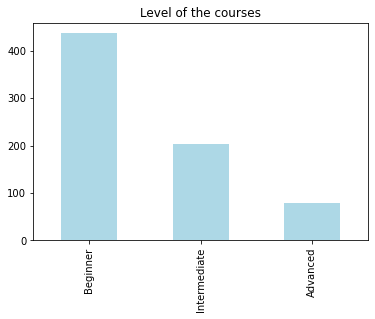

In [322]:
course_data['Difficulty Level'].value_counts().plot.bar(title='Level of the courses',color='lightblue')

### Pie Chart for Difficulty Level Column 
To know the percentage for each and every difficulty level

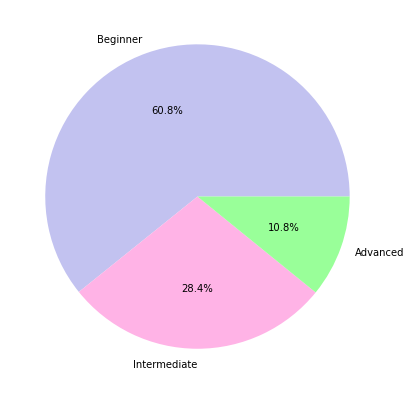

In [323]:
plt.figure(figsize=(10,7))
colors = ['#c2c2f0','#ffb3e6','#99ff99', '#66b3ff' ]
plt.pie(x=course_data['Difficulty Level'].value_counts().values,colors=colors,
        labels=course_data['Difficulty Level'].value_counts().index,
        autopct='%2.1f%%')

plt.show()

In [324]:
course_data['Difficulty Level'].value_counts()

Beginner        437
Intermediate    204
Advanced         78
Name: Difficulty Level, dtype: int64

### Count of the courses offered by different universities and organisations 

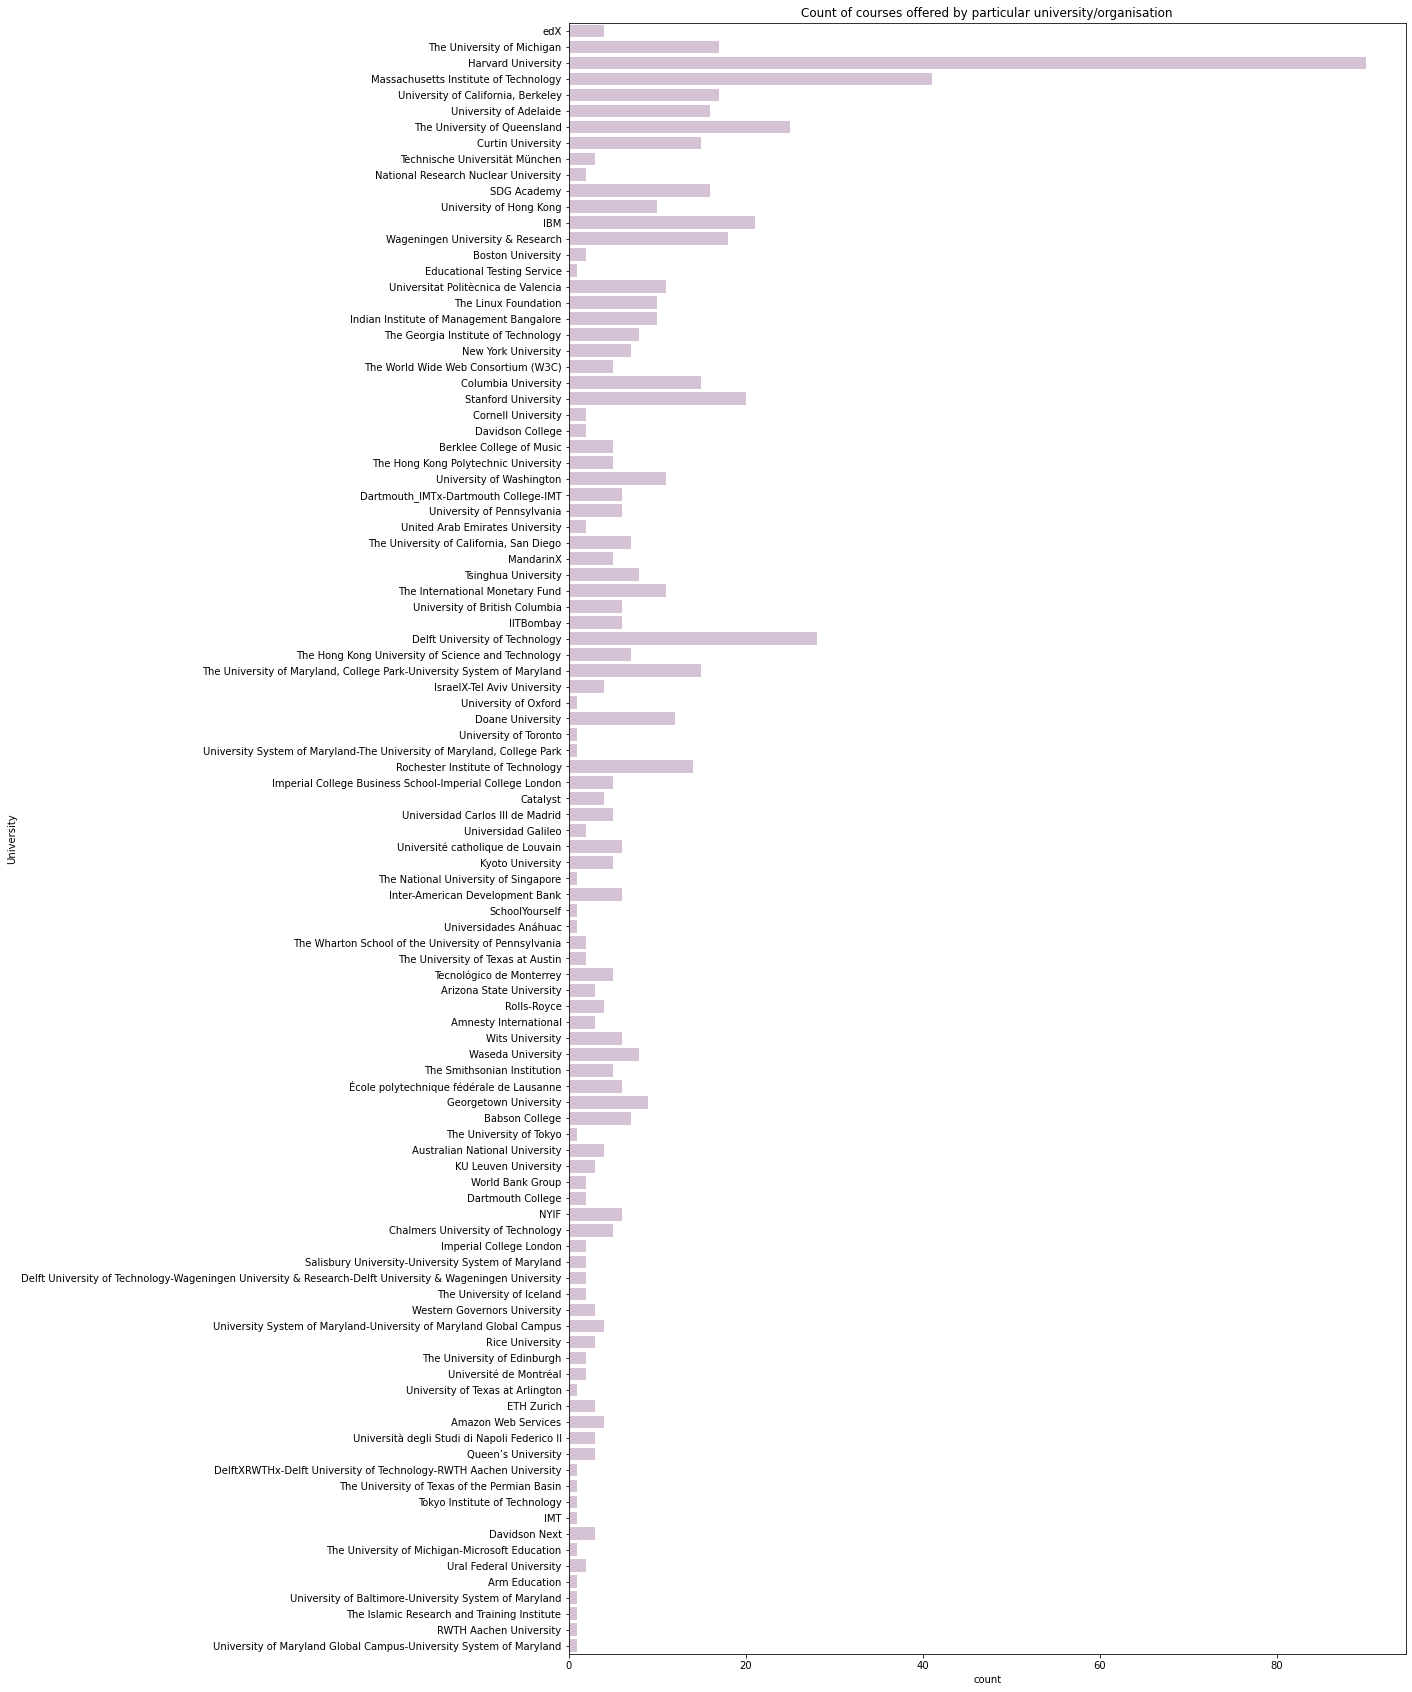

In [325]:
plt.figure(figsize = (15,30))
sns.countplot(y='University',data=course_data,color='thistle' ).set(title = 'Count of courses offered by particular university/organisation') 
plt.show()  


### Top 10 Universities and Organisations to offer most number of courses

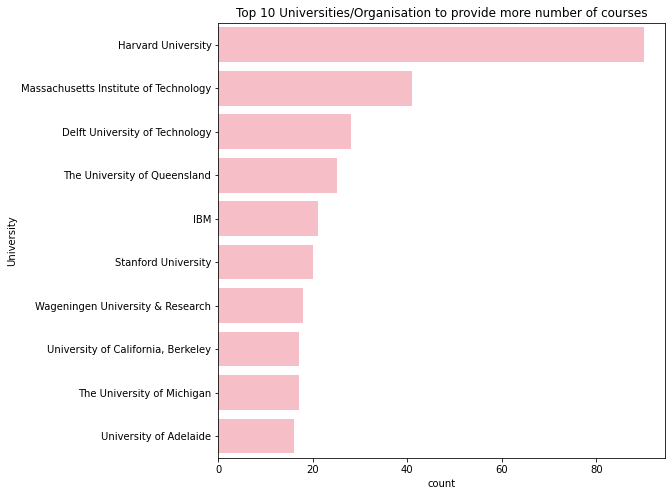

In [326]:
plt.figure(figsize = (8,8))
sns.countplot(y='University',data=course_data,
              order = course_data["University"].value_counts().index[:10],
              color='lightpink').set(title='Top 10 Universities/Organisation to provide more number of courses') 
plt.show()  


## 4.5 WordClouds

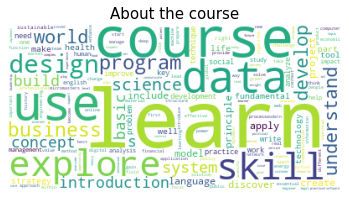

In [327]:
#Wordcloud - To visualise most frequent terms of "About" column of the dataset
text = course_data["About"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("About the course",fontsize=15)
plt.imshow(wordcloud_for_travel)

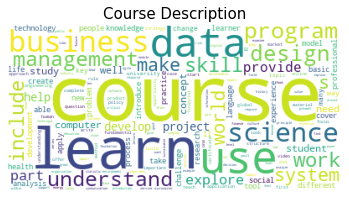

In [328]:
#Wordcloud - To visualise most frequent terms of Course Description
text = course_data["Course Description"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("Course Description",fontsize=15)
plt.imshow(wordcloud_for_travel)

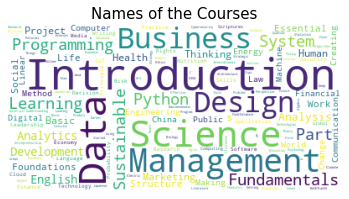

In [329]:
#Wordcloud - To visualise most frequent terms of Names of the courses
text = course_data["Name"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("Names of the Courses",fontsize=15)
plt.imshow(wordcloud_for_travel)

# 5. Conclusions Drawn:


1.	The most commonly occurring three words together are “data analysis statistic” . This implies that data analysis is closely related to statistics and also, these words are majorly mentioned by most of course descriptions indicating that these two are taught together.
2.	“Computer Science” is being the top most bi-gram with 150+ occurrences. This shows that CS is still the major topic among the courses offered by Universities and Organisations.
3.	Almost 61% of the courses are beginner friendly. This indicates that the users even without any pre-requisites are good to take up the courses.
4.	28% of the courses are of Intermediate Level and might require certain amount of background knowledge before enrolling in the courses.
5.	Harvard University is the top most university to offer a greater number of courses. In other words, almost 85+ courses are offered by this prestigious University.
6.	Successively, MIT (Massachusetts Institute of Technology) stood in the second position for being offering more than 40 courses.
7.	The about section of the dataset majorly speaks about “learn, course and skill”. This states that it talks about learning a new course or upskilling in a particular field.
8.	The course description part of the dataset is slightly similar to the about section of the dataset. Both are certainly talking about learning and courses.
9.	Majority of the Names of the Courses evidently have the term “Introduction”.
10.	This presence of the term “Introduction” justifies for having 61% beginner friendly courses as most of the courses might be an introduction to a certain technology or domain.
